In [58]:
#this code predicts the housing price with a artificial neural network
import pandas as pd
import numpy as np
from keras import models
from keras import layers

#read_data from 
data = pd.read_csv("./kc_house_data.csv")

#delete unrelevant features: house id and date
data = data.drop(['id', 'date','lat','long','waterfront','zipcode'],axis=1)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,1800,7503


In [59]:
#get the training and test data sets
y = data['price'].values
data = data.drop(['price'], axis=1)
data['yr_renovated'] = data['yr_renovated'].apply(lambda x: 1 if x>0 else 0)
x = data.values

#split the data into training set and test set
train_size = np.round(x.shape[0] * 0.75).astype(np.int32)

x_train = x[0:train_size]
y_train = y[0:train_size]

x_test = x[train_size:]
y_test = y[train_size:]

#normalize the features
x_train = (x_train - np.mean(x_train,axis=0))/np.std(x_train,axis=0)
x_test = (x_test - np.mean(x_test,axis=0))/np.std(x_test,axis=0)

In [110]:
from keras import backend as K
from keras import optimizers

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 
    
#build the price model
model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_shape=(x_train.shape[1],)))
model.add(layers.Dense(1))
model.compile(optimizer=optimizers.RMSprop(lr=0.2),loss=root_mean_squared_error,metrics=['mse'])
history = model.fit(x_train,y_train,batch_size=16,epochs=20,validation_data = (x_test,y_test))


Train on 16210 samples, validate on 5403 samples
Epoch 1/20
16210/16210 [==============================] - 2s 148us/step - loss: 172145.3845 - mean_squared_error: 78267878613.8966 - val_loss: 137466.9311 - val_mean_squared_error: 52917134388.8773
Epoch 2/20
16210/16210 [==============================] - 1s 73us/step - loss: 129497.8427 - mean_squared_error: 47703619449.5092 - val_loss: 137539.3771 - val_mean_squared_error: 54494868499.3315
Epoch 3/20
16210/16210 [==============================] - 1s 68us/step - loss: 127486.7291 - mean_squared_error: 46170677291.0194 - val_loss: 137441.6510 - val_mean_squared_error: 50136761365.2267
Epoch 4/20
16210/16210 [==============================] - 1s 68us/step - loss: 126457.6562 - mean_squared_error: 45122428861.7969 - val_loss: 139139.5776 - val_mean_squared_error: 55917167854.4216
Epoch 5/20
16210/16210 [==============================] - 1s 68us/step - loss: 125620.9609 - mean_squared_error: 44853299548.3242 - val_loss: 135429.8257 - val_me

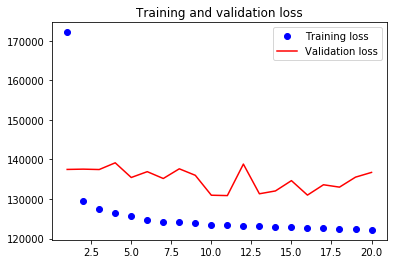

In [111]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1,len(train_loss)+1)
plt.plot(epochs,train_loss,'bo',label="Training loss")
plt.plot(epochs,validation_loss,'r',label="Validation loss")
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [112]:
print("train_loss")
for i in range(len(train_loss)):
    print(train_loss[i])
    
print("validation_loss")
for i in range(len(validation_loss)):
    print(validation_loss[i])

train_loss
172145.38445018508
129497.84268391425
127486.72907927206
126457.65617674275
125620.96090954657
124774.37590029303
124300.72831778224
124132.58858536398
123898.63803015114
123518.02652297964
123458.57608921961
123080.92150485811
123212.5781944016
122891.47837176126
122871.92320326959
122722.18144471006
122537.42959207279
122532.42963641271
122300.6308181678
122177.66008251079
validation_loss
137466.93106115816
137539.37710820377
137441.65098527438
139139.57760156394
135429.82565386128
136901.8114430062
135174.64673850176
137624.4226789515
135977.17222058348
130946.12849053767
130856.3695111512
138816.2455652531
131311.4894560892
132028.44433647973
134635.16762533545
130976.67029746206
133593.11940848833
132991.70932525911
135515.80504175922
136715.3313610494


In [113]:
y_pred = model.predict(x_test,batch_size=64)

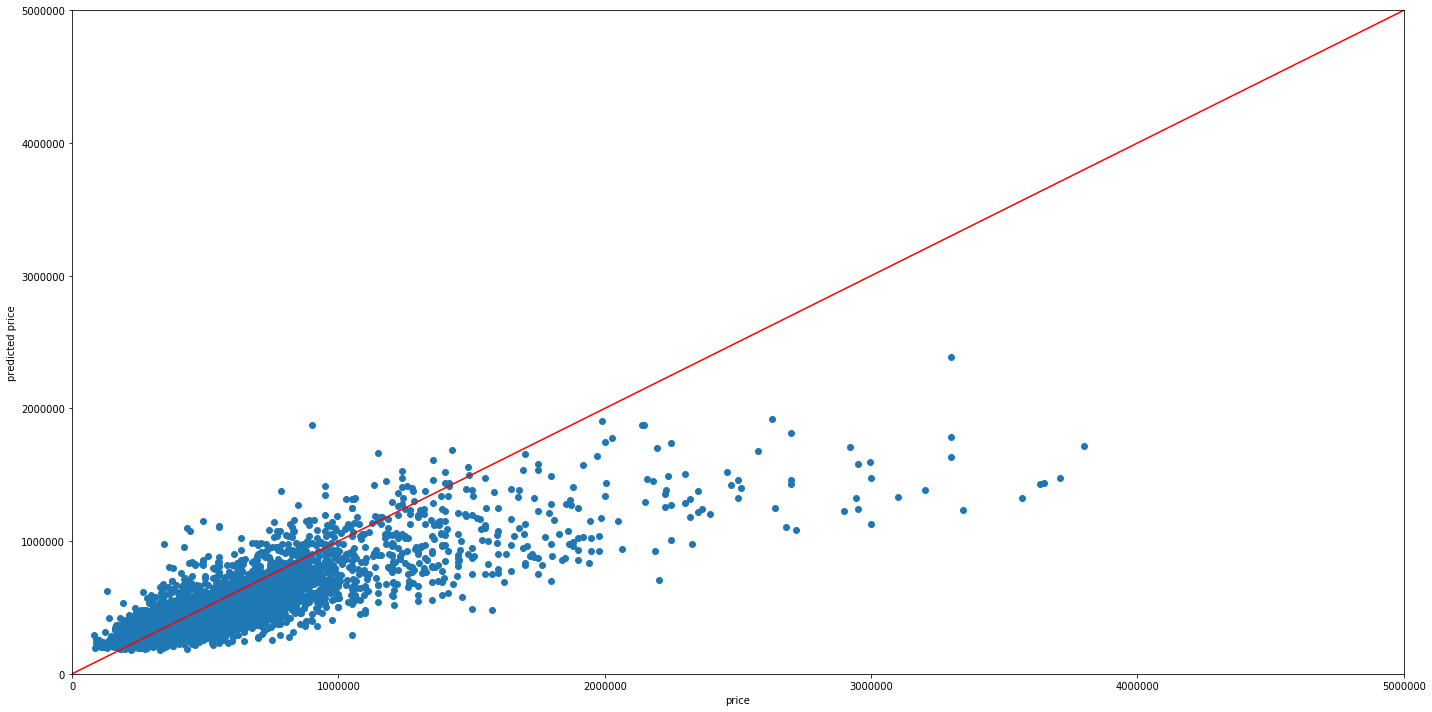

In [129]:
from matplotlib.patches import mlines
f,ax = plt.subplots(1,1,figsize=(20,10))
ax.scatter(y_test,y_pred)
ax.set_xlim(0,5000000)
ax.set_ylim(0,5000000)
ax.set_xlabel("price")
ax.set_ylabel("predicted price")
line = mlines.Line2D([0,1],[0,1],color='red')
transform = ax.transAxes
line.set_transform(transform)
ax.add_line(line)
plt.tight_layout()